In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, mean_squared_error

In [2]:
billing = pd.read_csv('NoSurpriseBillingChildbirth.csv')

In [3]:
billing.head()

,States,Billing Protections,Childbirth costs,Malpractice payment amount per physician,Specialists per state,White,Black,Hispanic,Asian,American Indian/Alaska Native,...,65+,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Cost of Living,Total HHI_Health Insurance,Total HHI_Hospital Inpatient Services
0,Arkansas,0,15005,1754.84,52.22,72.1,15.2,7.8,1.6,0.6,...,17.3,42.0,5.4,26.2,15.9,1.4,9.1,86.9,3054,2739
1,California,1,26380,1693.24,52.89,36.4,5.3,39.5,14.7,0.4,...,14.9,48.0,6.6,25.3,11.4,0.9,7.8,151.7,2161,13407
2,Connecticut,1,17072,4810.00,56.83,65.7,10.0,16.9,4.6,0.2,...,17.7,52.9,4.8,21.5,14.1,0.7,5.9,127.7,2193,3136
3,Florida,1,22015,4936.99,53.04,53.0,15.0,26.6,2.7,0.2,...,21.1,40.3,9.5,17.4,18.0,1.7,13.1,97.9,2358,3382
4,Illinois,1,16241,5711.64,49.65,60.9,13.6,17.6,5.6,0.1,...,16.0,54.6,5.2,18.2,14.1,0.7,7.3,94.5,3913,3898


In [4]:
billing.columns

Index(['States', 'Billing Protections', 'Childbirth costs',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services'],
      dtype='object')

In [7]:
correlation_table = billing[['States', 'Billing Protections', 'Childbirth costs',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']]

In [8]:
correlation_table.corr()

,Billing Protections,Childbirth costs,Malpractice payment amount per physician,Specialists per state,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,...,65+,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Cost of Living,Total HHI_Health Insurance,Total HHI_Hospital Inpatient Services
Billing Protections,1.000000,0.243798,0.351715,0.059426,-0.319000,-0.142478,0.492395,0.581249,-0.305019,-0.153227,...,0.341763,0.163156,0.077613,0.023147,0.056044,-0.504167,-0.393656,0.762194,-0.416239,0.086674
Childbirth costs,0.243798,1.000000,0.432193,-0.082974,-0.611852,0.043805,0.726754,0.604452,-0.183135,0.018049,...,-0.033780,-0.115545,0.186952,0.108686,-0.189014,-0.254747,0.155457,0.282756,-0.107041,0.397465
Malpractice payment amount per physician,0.351715,0.432193,1.000000,0.222861,-0.402511,0.264823,0.281717,0.278108,-0.081282,-0.307178,...,0.026746,0.037435,-0.047784,0.106984,-0.099944,-0.459861,-0.089408,0.207449,-0.038690,-0.386810
Specialists per state,0.059426,-0.082974,0.222861,1.000000,-0.304049,0.346138,0.128853,0.211073,-0.287557,0.071723,...,-0.333884,0.108983,0.007776,0.290802,-0.484977,-0.291623,-0.374906,0.276310,-0.132955,-0.113896
White,-0.319000,-0.611852,-0.402511,-0.304049,1.000000,-0.508988,-0.766485,-0.721337,0.010565,-0.038386,...,0.254286,0.189697,-0.209292,-0.320081,0.490551,0.135704,-0.114821,-0.440263,0.055635,-0.396368
Black,-0.142478,0.043805,0.264823,0.346138,-0.508988,1.000000,-0.120272,-0.042389,-0.179256,-0.352262,...,-0.011189,-0.375950,-0.146809,0.421309,-0.074396,0.308013,0.080766,-0.116720,0.476279,-0.212138
Hispanic,0.492395,0.726754,0.281717,0.128853,-0.766485,-0.120272,1.000000,0.817663,-0.065785,0.312824,...,-0.213933,0.028902,0.449402,0.059262,-0.464906,-0.401016,0.049620,0.552415,-0.420604,0.620675
Asian,0.581249,0.604452,0.278108,0.211073,-0.721337,-0.042389,0.817663,1.000000,-0.181340,0.109323,...,-0.282255,0.229712,0.028564,0.195554,-0.543153,-0.558385,-0.349062,0.792299,-0.402237,0.542484
American Indian/Alaska Native,-0.305019,-0.183135,-0.081282,-0.287557,0.010565,-0.179256,-0.065785,-0.181340,1.000000,0.094519,...,-0.155342,-0.174687,-0.005576,-0.150368,-0.002412,0.319892,0.630201,-0.264153,0.116165,-0.030000
Native Hawaiian/Other Pacific Islander,-0.153227,0.018049,-0.307178,0.071723,-0.038386,-0.352262,0.312824,0.109323,0.094519,1.000000,...,-0.549090,0.130453,0.599745,-0.177988,-0.498659,-0.093620,0.173886,0.067431,-0.243455,0.428326


In [9]:

billing.median()

C:\Users\589598\AppData\Local\Temp\1/ipykernel_10724/1167046430.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  billing.median()


Billing Protections                             1.00
Childbirth costs                            15121.00
Malpractice payment amount per physician     3600.36
Specialists per state                          52.89
White                                          65.70
Black                                          10.00
Hispanic                                       11.10
Asian                                           2.70
American Indian/Alaska Native                   0.30
Native Hawaiian/Other Pacific Islander          0.00
Multiple Races                                  2.40
Children 0-18                                  23.30
Adults 19-25                                    8.60
Adults 26-34                                   11.70
Adults 35-54                                   25.40
Adults 55-64                                   13.60
65+                                            16.90
Employer                                       49.30
Non-Group                                     

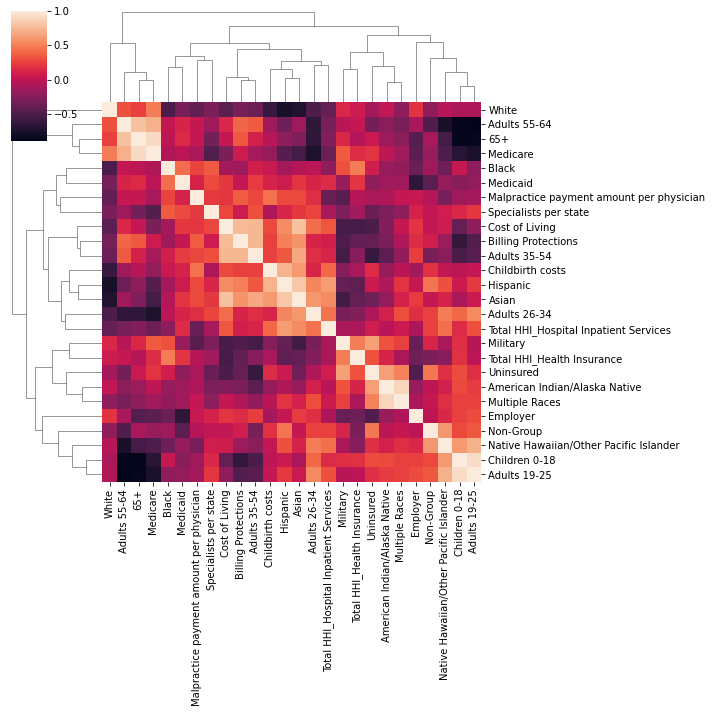

In [10]:
sns.clustermap(correlation_table.corr());

In [11]:
# Define X and y.

feature_cols = ['Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Childbirth costs'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
lr =LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3004531157136049, 'Hispanic'),
 (0.14060790583994973, 'Malpractice payment amount per physician'),
 (0.11627935247074449, 'Asian'),
 (0.11134081577671416, 'Total HHI_Hospital Inpatient Services'),
 (0.0666243632859575, 'White'),
 (0.06493164725191222, 'Cost of Living'),
 (0.03416926931280074, 'Employer'),
 (0.026335458144737242, 'Non-Group'),
 (0.023825654687198862, 'Specialists per state'),
 (0.018420384881875522, 'Medicaid'),
 (0.011233363434676593, 'Uninsured'),
 (0.011046917900921318, 'Adults 26-34'),
 (0.010945335390114492, 'Military'),
 (0.010704350995335404, 'Adults 19-25'),
 (0.010436143551455836, 'Total HHI_Health Insurance'),
 (0.00889900037033146, 'Black'),
 (0.006883744992569142, '65+'),
 (0.006192706535068078, 'Adults 55-64'),
 (0.005504186393064753, 'Children 0-18'),
 (0.004874020504432898, 'Native Hawaiian/Other Pacific Islander'),
 (0.003746392428638699, 'Medicare'),
 (0.003203597671887231, 'Multiple Races'),
 (0.0022997780339543143, 'Adults 35-54'),
 (0.00104249443